# Learn what a depth chart is and how to create it in Python

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from binance.spot import Spot as Client

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

## Getting the data

In [11]:
spot_client = Client(base_url="https://api3.binance.com")
depth_dict = spot_client.depth("ETHUSDT", limit=100)

In [12]:
depth_dict.keys()

dict_keys(['lastUpdateId', 'bids', 'asks'])

In [13]:
df_list = []
for side in ["bids", "asks"]:
    df = pd.DataFrame(depth_dict[side], columns=["price", "quantity"], dtype=float)
    df["side"] = side
    df_list.append(df)

df = pd.concat(df_list).reset_index(drop=True)

In [14]:
df

,price,quantity,side
0,3391.70,6.9870,bids
1,3391.30,2.5366,bids
2,3391.25,0.4387,bids
3,3391.24,6.1262,bids
4,3391.22,0.3222,bids
...,...,...,...
195,3395.02,0.9898,asks
196,3395.03,1.0357,asks
197,3395.13,0.5929,asks
198,3395.21,5.0148,asks


In [15]:
df.groupby("side").price.describe()

,count,mean,std,min,25%,50%,75%,max
side,,,,,,,,
asks,100.0,3393.4386,1.005174,3391.71,3392.6050,3393.535,3394.345,3395.23
bids,100.0,3389.3674,0.958785,3388.03,3388.5175,3389.285,3390.155,3391.70


## Plotting

Text(0, 0.5, 'Quantity')

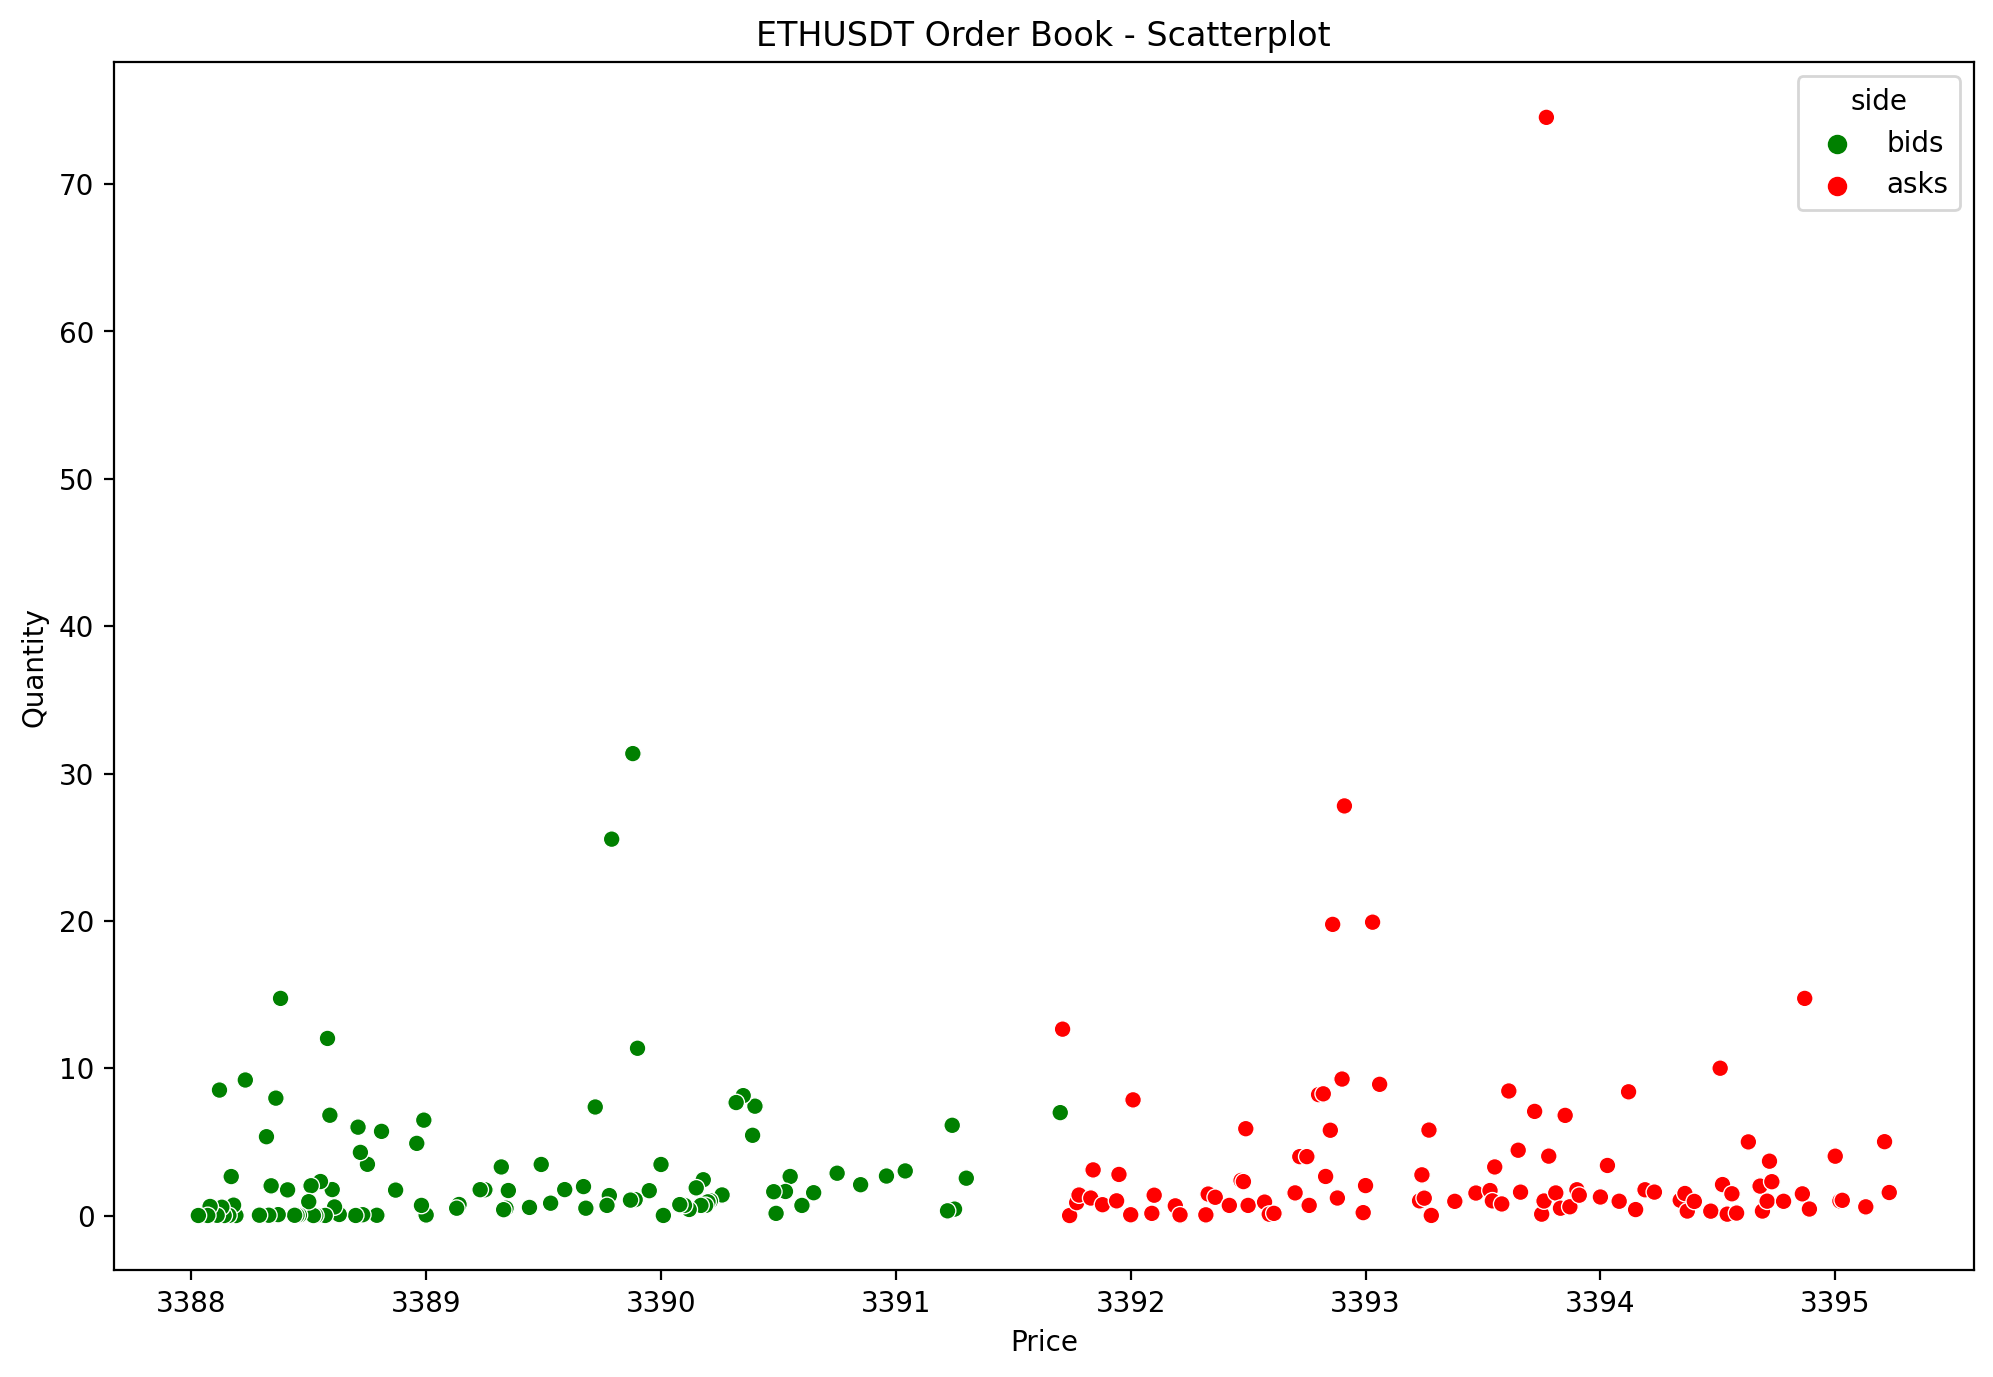

In [16]:
fig, ax = plt.subplots()
ax.set_title(f"ETHUSDT Order Book - Scatterplot")
sns.scatterplot(x="price", y="quantity", hue="side", 
                data=df, ax=ax, palette=["green", "red"])
ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

<AxesSubplot:title={'center':'ETHUSDT Order Book - Histogram'}, xlabel='price', ylabel='Count'>

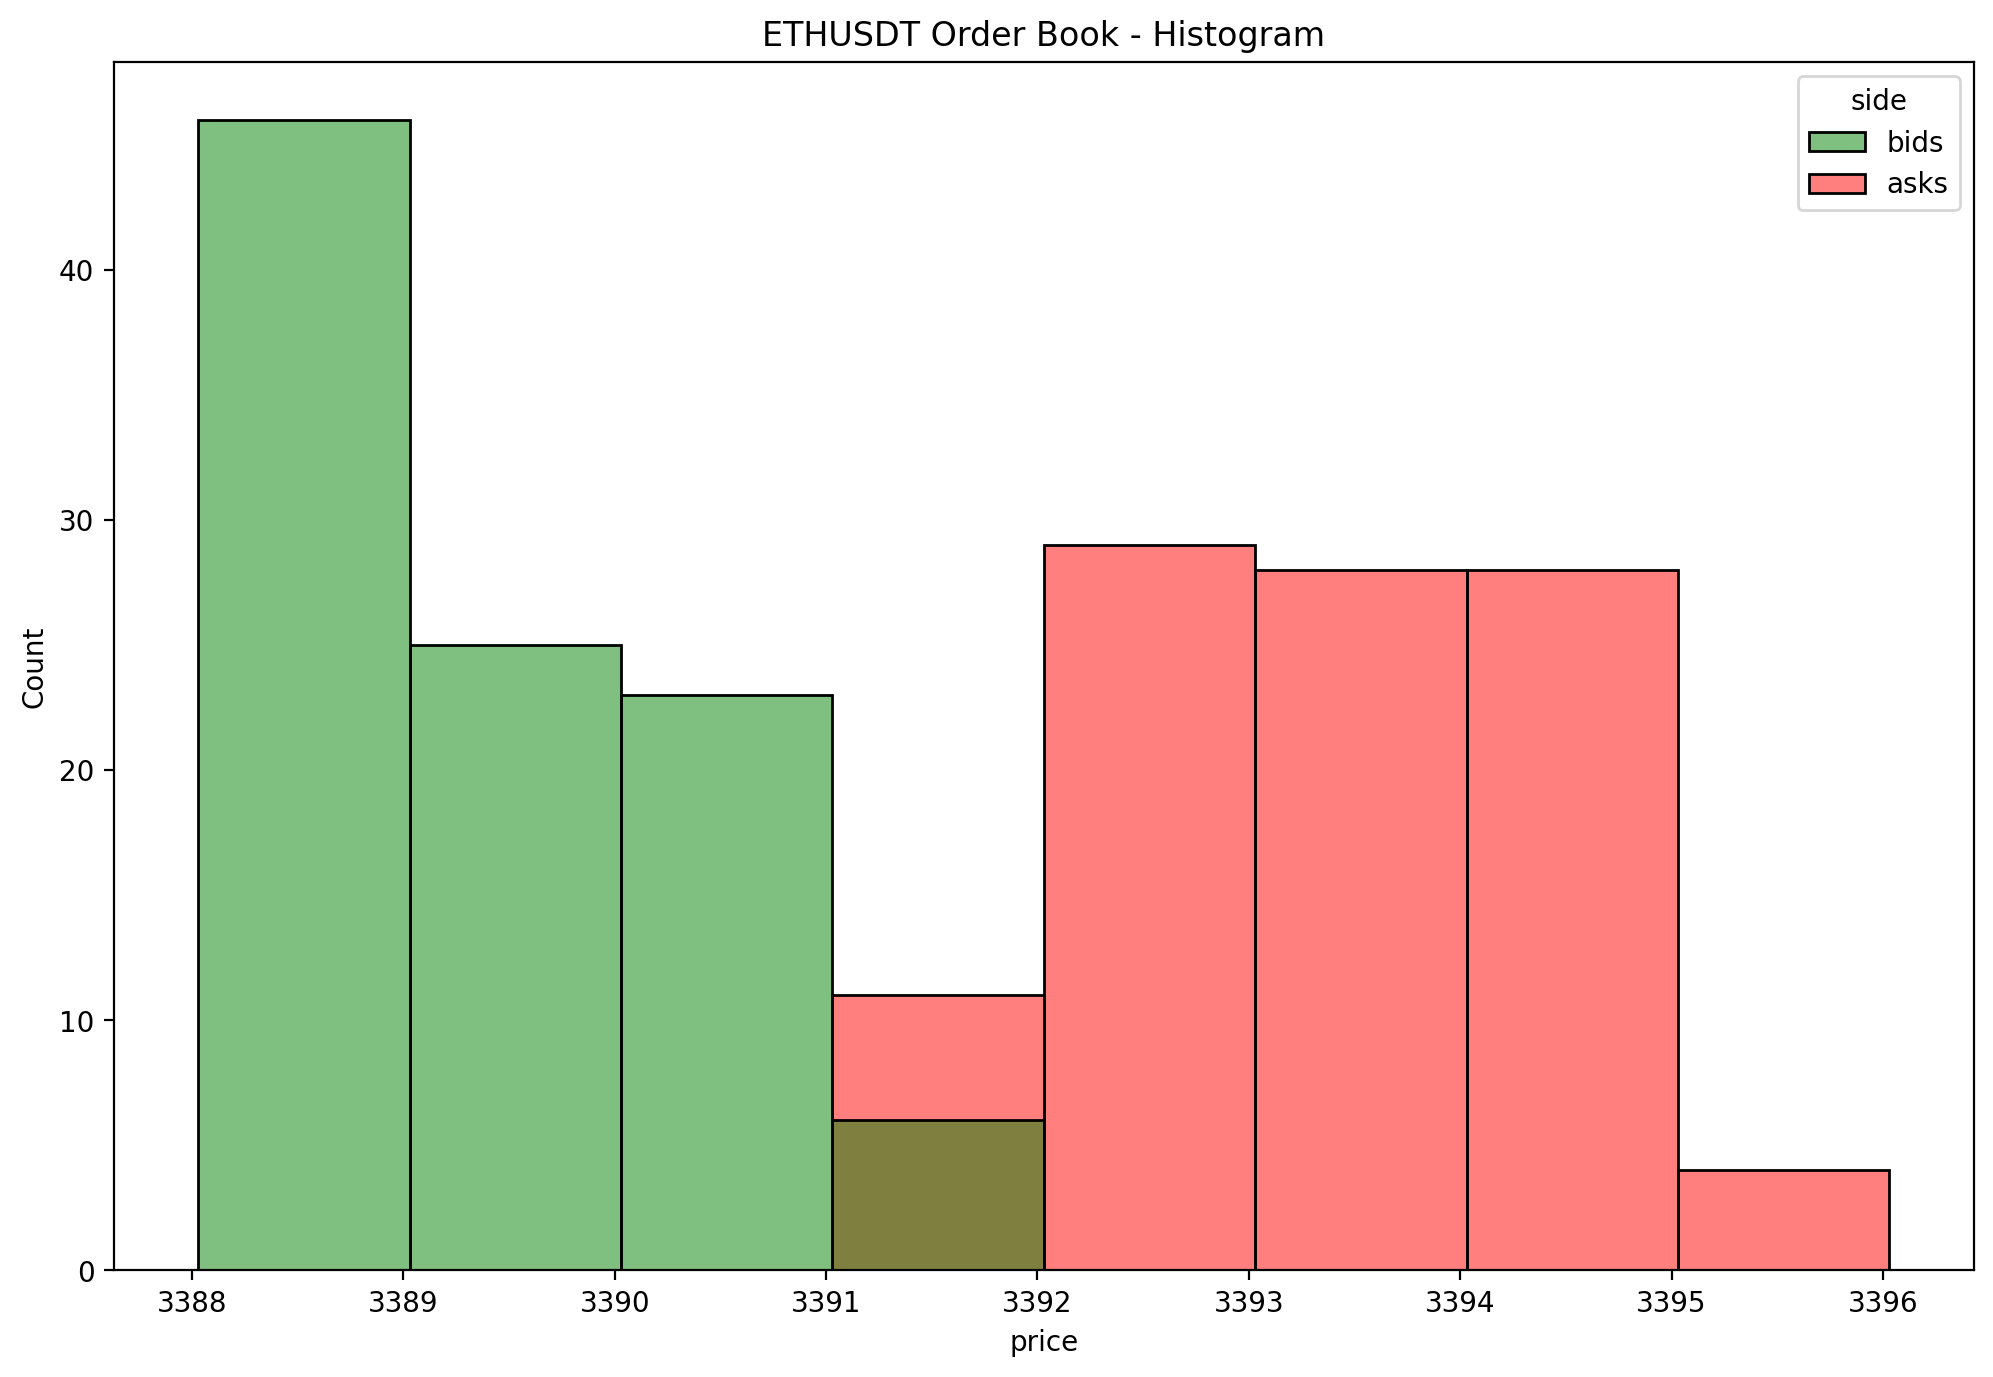

In [17]:
fig, ax = plt.subplots()
ax.set_title(f"ETHUSDT Order Book - Histogram")
sns.histplot(x="price", hue="side", binwidth=1, 
             data=df, palette=["green", "red"], 
             ax=ax)

Text(0, 0.5, 'Quantity')

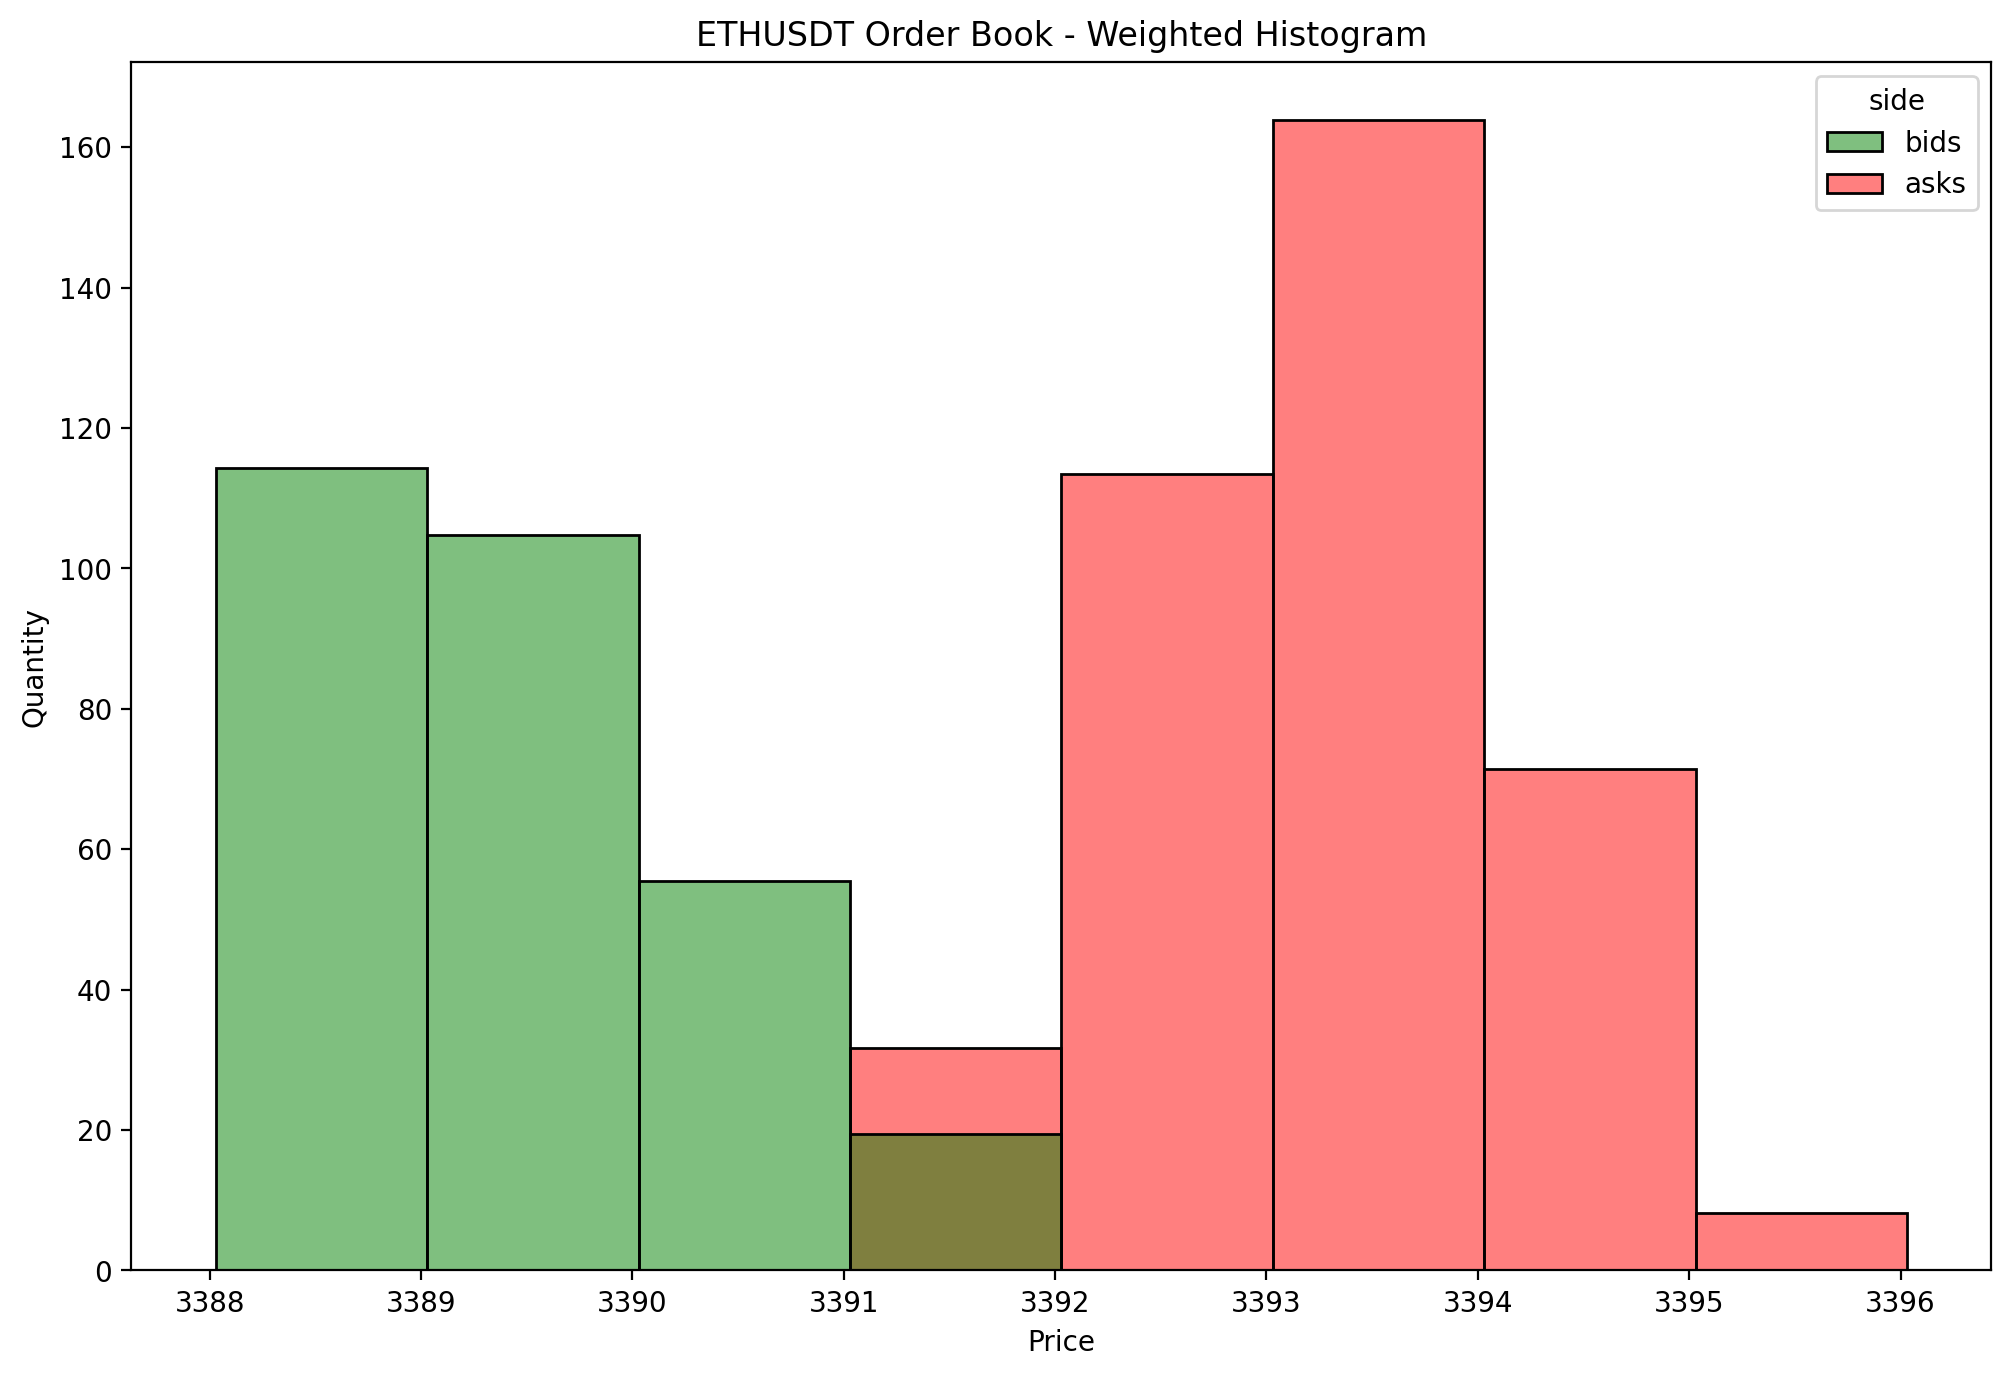

In [18]:
fig, ax = plt.subplots()
ax.set_title(f"ETHUSDT Order Book - Weighted Histogram")
sns.histplot(x="price", hue="side", weights="quantity", 
             binwidth=1, data=df, palette=["green", "red"], 
             ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

Text(0, 0.5, 'Quantity')

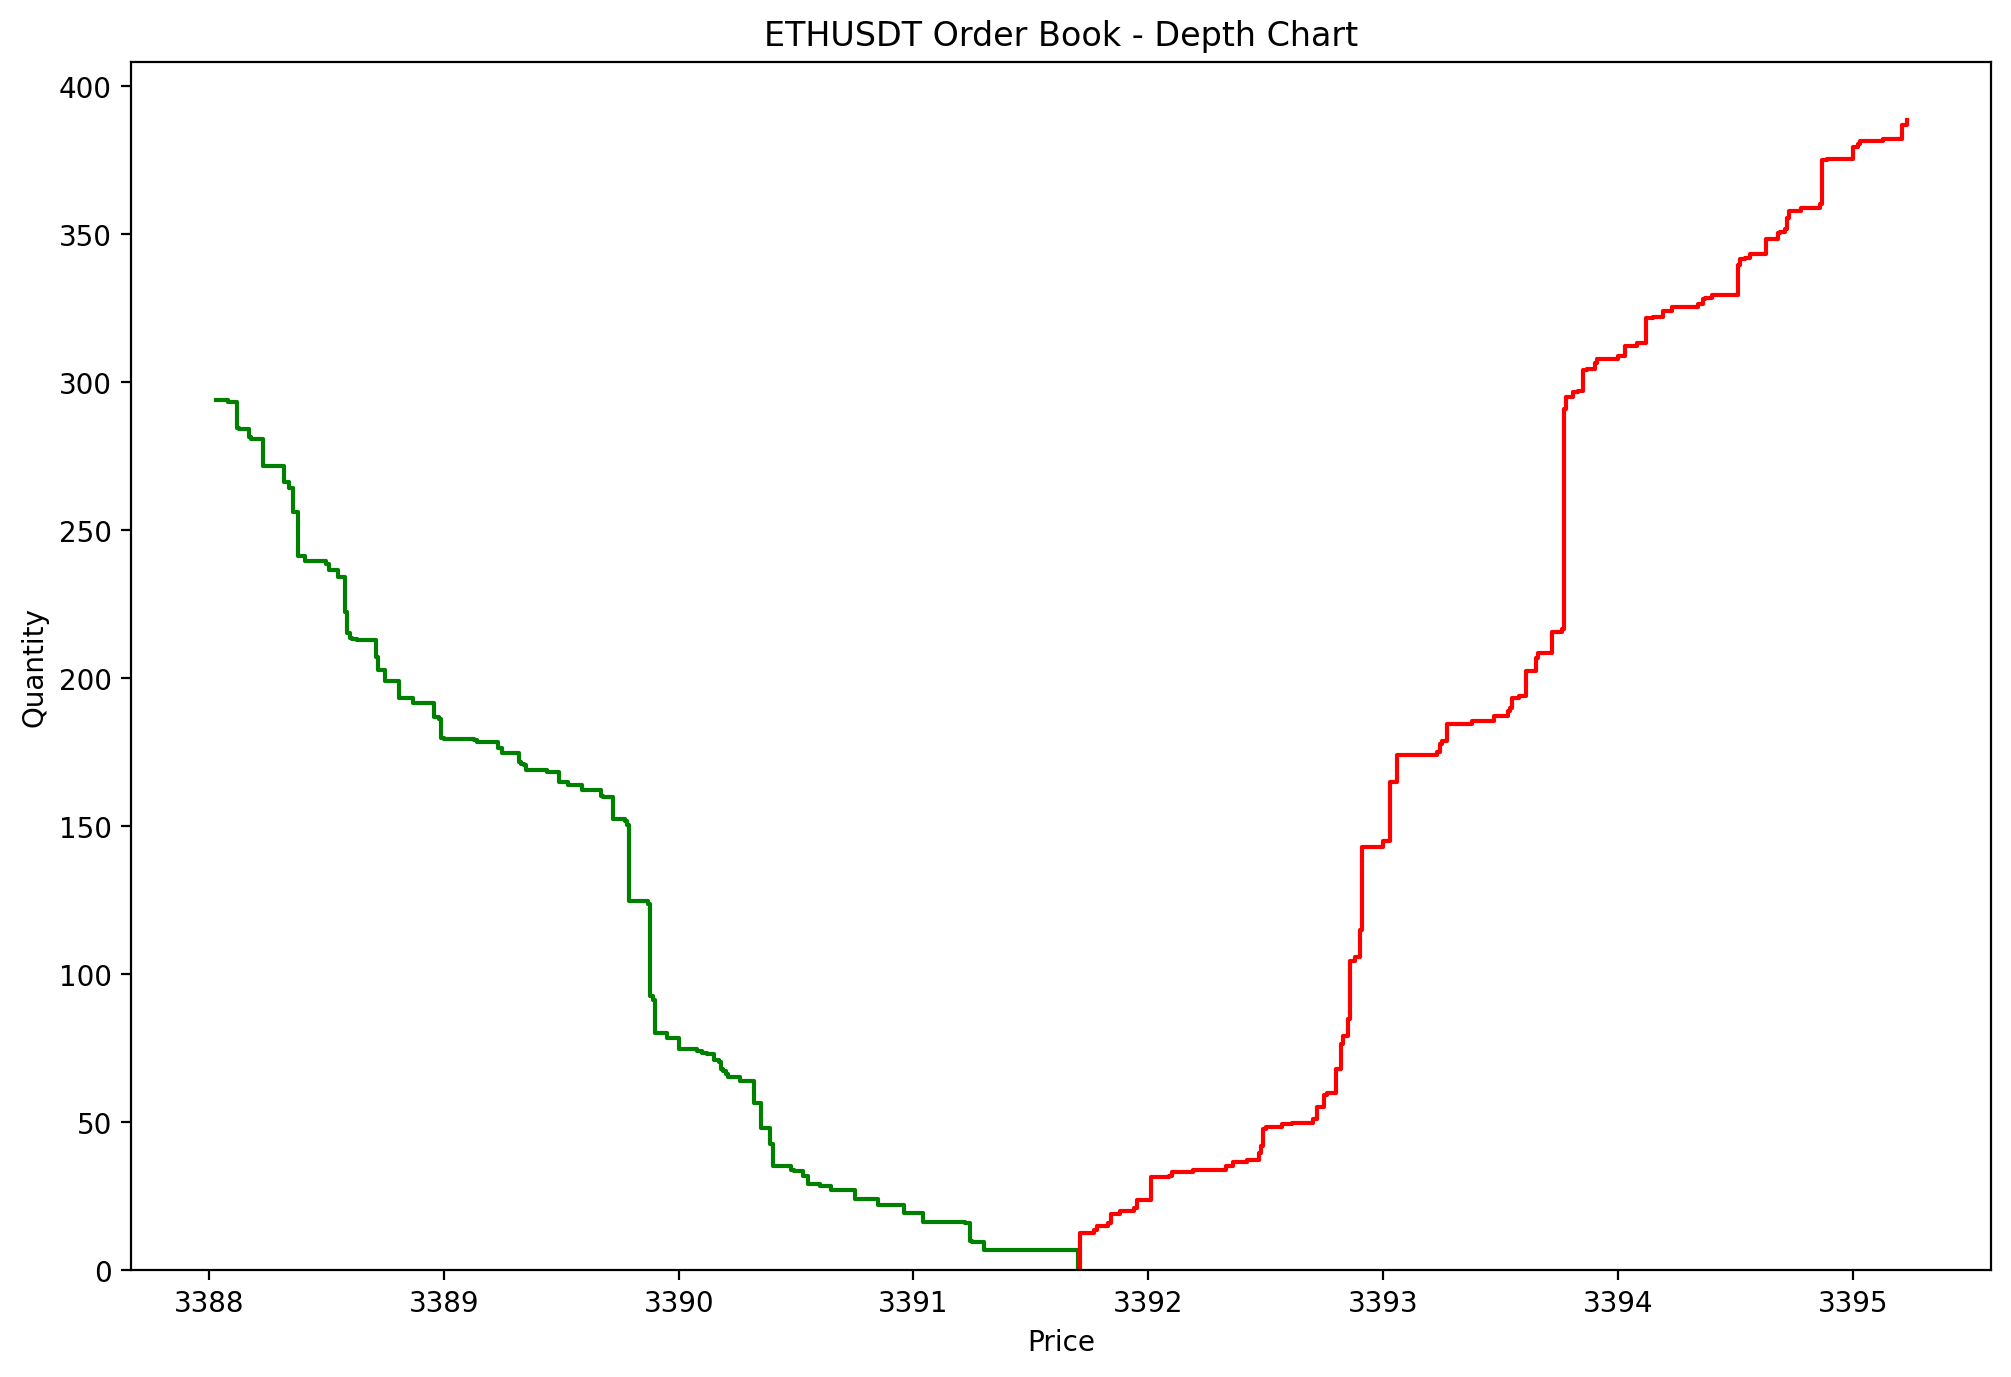

In [20]:
fig, ax = plt.subplots()
ax.set_title(f"ETHUSDT Order Book - Depth Chart")
sns.ecdfplot(x="price", weights="quantity", stat="count", 
             complementary=True, data=df.query("side == 'bids'"), 
             color="green", ax=ax)
sns.ecdfplot(x="price", weights="quantity", stat="count", 
             data=df.query("side == 'asks'"), color="red", 
             ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("Quantity")